In [27]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [28]:
df = sns.load_dataset('penguins')
dfcopia = df.copy()
dfcopia = dfcopia.dropna(axis=0)
especies = dfcopia['species'].unique()
print(especies)

dfcopia['specie numerica'] = 0

i = 0
for pinguin in dfcopia['species']:
    #print(pinguin)
    if pinguin == 'Adelie':
        dfcopia['specie numerica'].iloc[i] = 1
        i += 1
    elif pinguin == 'Chinstrap':
        dfcopia['specie numerica'].iloc[i] = 2
        i += 1
    elif pinguin == 'Gentoo':
        dfcopia['specie numerica'].iloc[i] = 3
        i += 1
    #print(dfcopia['species'].iloc[i-1],dfcopia['specie numerica'].iloc[i-1])

features_numericos = ["bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g"]
df_numericos = dfcopia[features_numericos]

['Adelie' 'Chinstrap' 'Gentoo']


Considerando a profundidade do bico como target, percebemos que talvez não fosse a melhor opção. Assim, decidimos incluir dados categóricos, modificando o objetivo para a previsão da espécie do pinguim a partir dos dados de comprimento e profundidade do bico, massa corporal e comprimento da asa. Para isso, cada espécie recebeu um número, como demonstrado no código acima. 

## Normalizando os dados

In [29]:
sc = StandardScaler()
sc.fit(df_numericos)
X_norm = sc.transform(df_numericos)

É preciso normalizar os dados para que eles não tenham dimensões muito diferentes.

## Rodando o PCA

Realiza a análise das componentes principais, sendo elas diferentes combinações das features.

In [30]:
pca = PCA()
pca.fit(X_norm)
df_pca = pca.transform(X_norm)

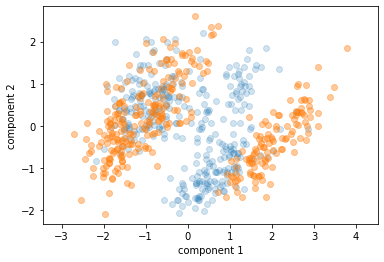

In [31]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.4)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');

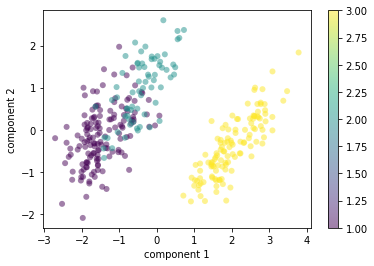

In [32]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], edgecolor='none', alpha=0.5, c=dfcopia["specie numerica"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

No gráfico acima é possível observar a redução de 4 para 2 dimensões, plotando os dados em função das duas principais componentes. Além disso, vê-se também que, quando coloridas em função das espécies, é possível notar a presença de 3 grupos distintos. Sabe-se que as 3 espécies que aparecem no dataset são Adelie, Chinstrap e Gentoo e, portanto, a separação encontrada é coerente. 

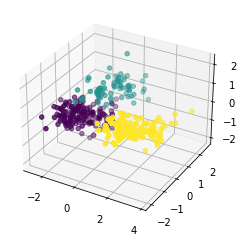

In [33]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=dfcopia["specie numerica"].values)

In [34]:
component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=component_names)
df_pca.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=df_numericos.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
bill_length_mm,0.453753,0.600195,0.642495,0.145170
bill_depth_mm,-0.399047,0.796170,-0.425800,-0.159904
flipper_length_mm,0.576825,0.005788,-0.236095,-0.781984
body_mass_g,0.549675,0.076464,-0.591737,0.584686


Na componente que cobre a maior parte dos dados - PC1 -, as features que mais influenciam são a massa corporal e comprimento da asa. Para a segunda componente, o comprimento e profundidade do bico são as features mais importantes.

array([<AxesSubplot:title={'center':'Variancia explicada'}, xlabel='Componente'>,
       <AxesSubplot:title={'center':'Variância acumulada'}, xlabel='Componente'>],
      dtype=object)

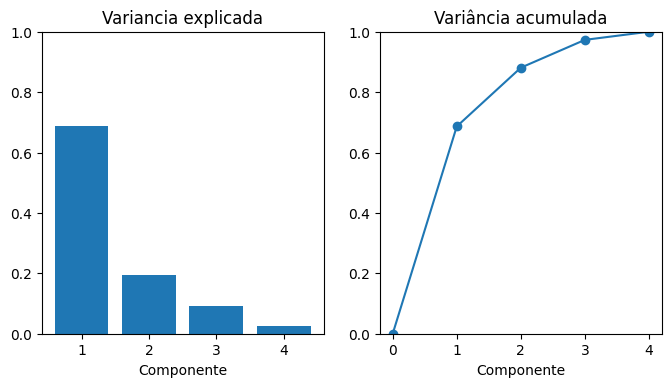

In [35]:
def plot_variance(pca, width=8, dpi=100):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", 
        title="Variancia explicada", 
        ylim=(0.0, 1.0)
    )
    
    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", 
        title="Variância acumulada", 
        ylim=(0.0, 1.0)
    )
    
    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs

# Graficar
plot_variance(pca)


O primeiro gráfico possui sempre a mesma aparência, uma vez que o PCA organiza seus componentes por ordem de maior variância, ou seja, de acordo com a quantidade de dados abrangidos. Assim, a partir da análise de variância acumulada, é possível observar que a primeira componente atinge cerca de 70% dos dados, o que melhora ainda mais se somado com a PC1, alcançando aproximadamente 90%. Portanto, considerar apenas PC1, PC2 e PC3 é uma opção de otimização, uma vez que a PC4 possui baixa variância.